# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
    >- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
    >- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
    >- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
    
> ### Questions to be answered through analysis
    >- 1.Which genres are most popular from year to year? 
    >- 2.Who is the top movies_release director?
    >- 3.What is the most popular movies?
    >- 4.Which Genre Has The Highest amount Of Movies?
    >- 5.Top Production Company With Higher Number Of Release
    >- 6.Who Is The Most Frequent Actor?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Big Dataset with 10866 Rows and 21 Columns

In [5]:
data.shape

(10866, 21)

#### - Below is General info about data 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> ##### 1. As shown in the Output of info() function we can see that [homepage,tagline,production_companies, keywords] columns  has alot of NAN values.
> #####  2. Also columns [genres,overview,cast,imdb_id,director] has little NAN values.

In [7]:
round(data.isnull().sum(axis=0)*100/data.shape[0],2)

id                       0.00
imdb_id                  0.09
popularity               0.00
budget                   0.00
revenue                  0.00
original_title           0.00
cast                     0.70
homepage                72.98
director                 0.40
tagline                 25.99
keywords                13.74
overview                 0.04
runtime                  0.00
genres                   0.21
production_companies     9.48
release_date             0.00
vote_count               0.00
vote_average             0.00
release_year             0.00
budget_adj               0.00
revenue_adj              0.00
dtype: float64

> ##### Above is the percentage of NAN values according to the total values in each column

In [8]:
data.describe(include=['O'])

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


#### - Above we Check data Uniqness and counts in our data

In [1]:
data['original_title'].value_counts()

NameError: name 'data' is not defined

In [ ]:
data['original_title'].value_counts()

#### check if Duplicated original titles is for the same movies or for different ones by release year

In [10]:
data[data.original_title=='Hamlet']

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1890,28238,tt1449175,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,http://www.bbc.co.uk/hamlet/,Gregory Doran,"To be, or not to be?",...,David Tennant stars in a film of the Royal Sha...,185,Drama,NHK Enterprises|Illuminations|BBC Wales,12/26/09,13,6.4,2009,0.000000e+00,0.000000e+00
8573,10549,tt0116477,0.383469,0,0,Hamlet,Kenneth Branagh|Derek Jacobi|Julie Christie|Ri...,NaN,Kenneth Branagh,NaN,...,"Hamlet, Prince of Denmark, returns home to fin...",242,Drama,Castle Rock Entertainment|Turner Pictures (I),12/25/96,51,6.7,1996,0.000000e+00,0.000000e+00
8797,10688,tt0171359,0.277798,2000000,1568749,Hamlet,Ethan Hawke|Kyle MacLachlan|Diane Venora|Sam S...,NaN,Michael Almereyda,"Passion, Betrayal, Revenge, A hostile takeover...",...,Modern day adaptation of Shakespeare's immorta...,112,Drama,Miramax Films|double A Films,5/12/00,18,5.0,2000,2.532584e+06,1.986494e+06
10106,10264,tt0099726,0.067973,0,20710451,Hamlet,Mel Gibson|Glenn Close|Alan Bates|Paul Scofiel...,NaN,Franco Zeffirelli,The extraordinary adaptation of Shakespeare's ...,...,"Hamlet, Prince of Denmark, finds out that his ...",130,Drama|History,Icon Productions|Warner Bros. Pictures|Nelson ...,12/19/90,43,6.5,1990,0.000000e+00,3.456364e+07


### - Production companies's number of  Released Movies

In [11]:
data['production_companies'].value_counts()

Paramount Pictures                                                          156
Universal Pictures                                                          133
Warner Bros.                                                                 84
Walt Disney Pictures                                                         76
Columbia Pictures                                                            72
                                                                           ... 
Brookstreet Pictures|Sound Venture Productions                                1
Aloupis Productions|Hacienda Film Co.                                         1
Paramount Pictures|American Broadcasting Company (ABC)|ABC Entertainment      1
Miramax Films|Haft Entertainment|Matchmaker Films                             1
TriStar Pictures|Mundy Lane Entertainment                                     1
Name: production_companies, Length: 7445, dtype: int64

### - Most Popular genres

In [12]:
data['genres'].value_counts()

Drama                                          712
Comedy                                         712
Documentary                                    312
Drama|Romance                                  289
Comedy|Drama                                   280
                                              ... 
Fantasy|Drama|Comedy|Science Fiction|Family      1
War|Adventure|Drama                              1
Drama|Horror|Romance|Foreign                     1
Adventure|Drama|Action|Thriller|Crime            1
Action|Comedy|Horror|Western                     1
Name: genres, Length: 2039, dtype: int64

### - In order to decide if there is duplication or not I assumed I must have at leas these properties
- Same director
- Same name
- Same release year

In [13]:
data[['director','original_title','release_year']].value_counts()

director                   original_title                 release_year
Dwight H. Little           TEKKEN                         2010            2
 FrÃ©dÃ©ric Jardin         Nuit Blanche                   2011            1
Nick Love                  The Football Factory           2004            1
                           The Sweeney                    2012            1
Nick Lyon                  Bullet                         2014            1
                                                                         ..
Harley Cokeliss            Black Moon Rising              1986            1
                           Hercules and the Lost Kingdom  1994            1
Harmony Korine             Gummo                          1997            1
                           Spring Breakers                2013            1
Ã€lex Pastor|David Pastor  Carriers                       2009            1
Length: 10821, dtype: int64

### Below is th only duplicated row in our data

In [14]:
data[(data.director == 'Dwight H. Little')&(data.original_title=='TEKKEN')]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### - This emphasize what we found in the above cell

In [18]:
data.duplicated(subset=['imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director','genres', 'production_companies','vote_count', 'vote_average']).sum()

1

### Below is the release year & number of movies 

In [15]:
data['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1973     55
1971     55
1976     47
1974     47
1966     46
1975     44
1964     42
1970     41
1972     40
1967     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [16]:
data.columns.size

21

In [17]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### - Different movies with same Title. 
- May be movie sequence because it has different year release

In [19]:
data['original_title'].duplicated().sum()

295

In [22]:
data['popularity'].duplicated().sum()

52

In [23]:
data['id'].duplicated().sum()

1

> ### Duplicated values
> - One duplicated value in the data



### Data Cleaning (DROP NAN VALUES AND DROP DUPLICATES)

In [24]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
data.drop(columns=['budget_adj','revenue_adj','homepage','tagline','overview','imdb_id','keywords'],inplace=True)

#### 1- Drop columns with many NAN values and has nothing to do with answering our questions

In [25]:
#Test
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [26]:
data.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

##### 2- Drop NAN values in columns [cast,director,genres,production_companies,] 

In [27]:
data.dropna(subset=['cast', 'director','genres',
       'production_companies'],inplace =True)
#Test
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   int64  
 3   revenue               9773 non-null   int64  
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   int64  
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  release_date          9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


##### 3- Drop duplicated row

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
#Test
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


#### 4- Function to split the data seperated by '|' into lists for easy parsing during the exploration phase.

In [30]:
def count_genre(x):
    data_plot = data[x].str.cat(sep = '|')
    genre = pd.Series(data_plot.split('|'))
    info = genre.value_counts(ascending=False)
    return info

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  1.Which year has the highest release of movies?

<AxesSubplot:title={'center':'Number of movies per year'}, xlabel='release_year', ylabel='Movies Released'>

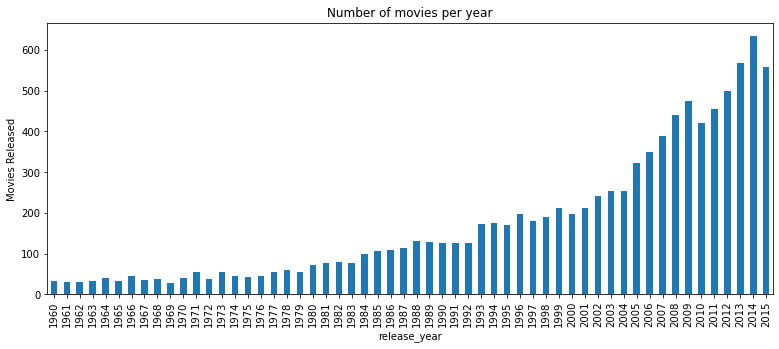

In [44]:
data.groupby('release_year').count().genres.plot(kind='bar',ylabel='Movies Released',use_index=True,figsize=(13,5),title='Number of movies per year')

### 2.Who is the top ten directors?

<AxesSubplot:title={'center':'Top 10 Director'}, xlabel='Number of movies', ylabel='Number of Movies'>

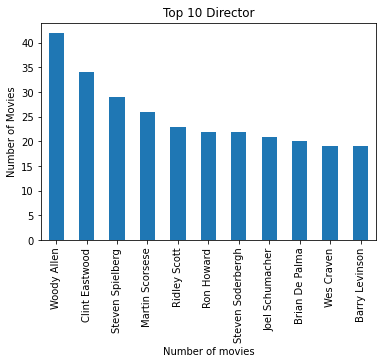

In [43]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
data['director'].value_counts().sort_values(ascending=False)[0:11].plot(kind='bar',xlabel='Number of movies',ylabel='Number of Movies',title='Top 10 Director')

### 3.What is the top-ten popular movies?

<AxesSubplot:title={'center':'Top 10 Popular movies'}, xlabel='Number of Movies', ylabel='popularity'>

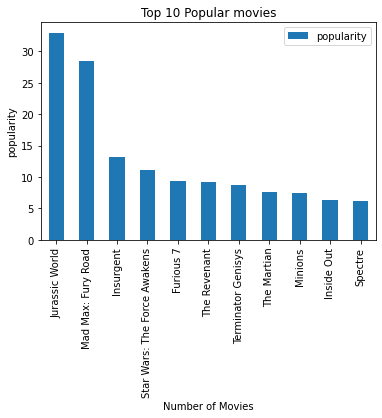

In [42]:
data[['original_title','popularity']].iloc[0:11,:].plot(kind='bar',x='original_title',y='popularity',ylabel='popularity',xlabel='Number of Movies',title='Top 10 Popular movies')

### 4.Which Genre Has The Highest amount Of Movies?

<AxesSubplot:title={'center':'Top 10 Production Companies'}, ylabel='Number of Movies'>

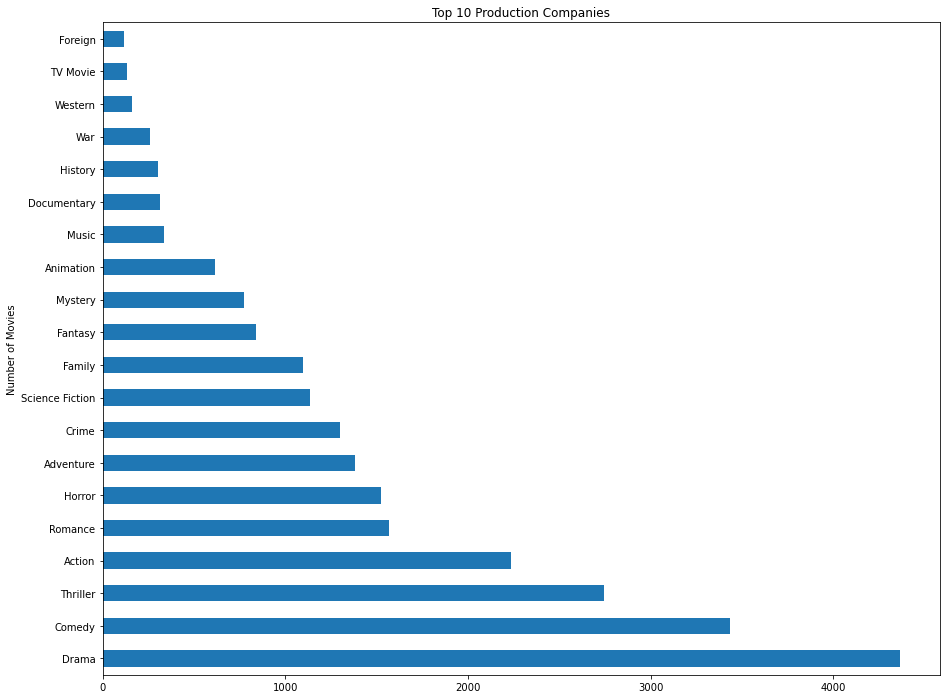

In [41]:
count_genre('genres').plot(kind='barh',figsize=(15,12),ylabel='Genre',xlabel='Number of Movies',title='Top 10 Production Companies')

### 5.Top 10 Production Companies With Higher Number Of Release??¶

<AxesSubplot:title={'center':'Top 10 Production Companies'}, xlabel='Production Companies', ylabel='Number of Movies'>

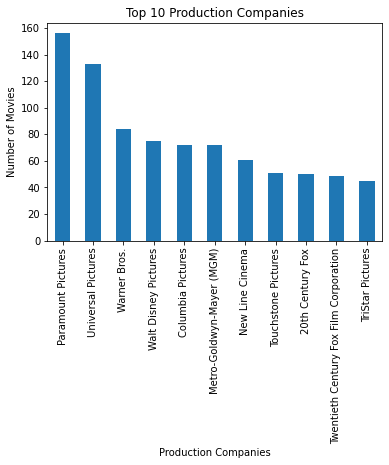

In [40]:
data['production_companies'].value_counts()[0:11].plot(kind='bar',xlabel='Production Companies',ylabel='Number of Movies',title='Top 10 Production Companies')

### 6.Who Is The Most Frequent 10 Actor?

<AxesSubplot:title={'center':'The Most Frequent 10 Actor'}, xlabel='Actor', ylabel='Number of Movies'>

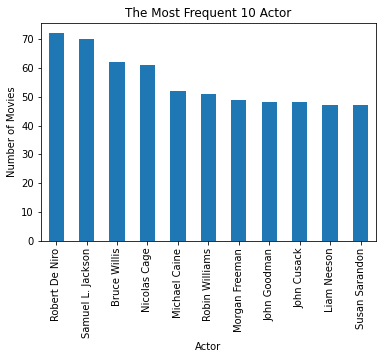

In [36]:
count_genre('cast')[0:11].plot(kind='bar',xlabel='Actor',ylabel='Number of Movies',title='The Most Frequent 10 Actor')

### 7.Movie with Highest And Lowest Vote Average?

<AxesSubplot:title={'center':'Movie with Highest Vote Average'}, xlabel='original_title'>

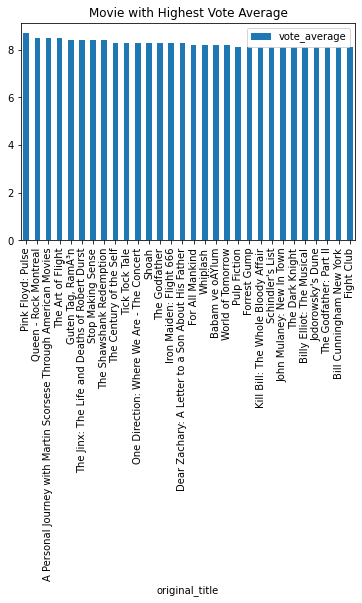

In [37]:
data[['vote_average','original_title']].sort_values(by='vote_average',ascending=False)[0:30].plot(kind='bar',x='original_title',y='vote_average',title='Movie with Highest Vote Average')

<AxesSubplot:title={'center':'Movie with Highest Vote Average'}, xlabel='original_title'>

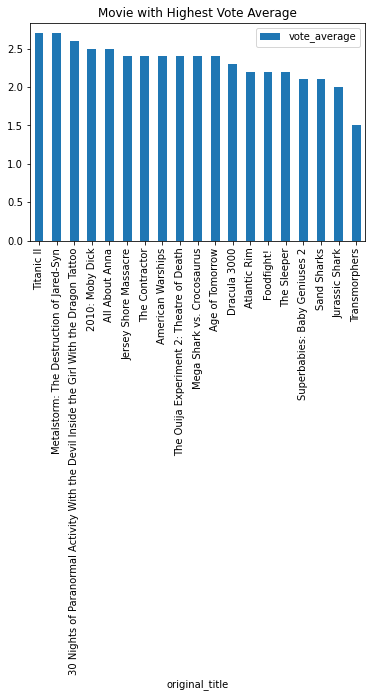

In [38]:
data[['vote_average','original_title']].sort_values(by='vote_average',ascending=False)[-20:-1].plot(kind='bar',x='original_title',y='vote_average',title='Movie with Highest Vote Average')

### 8.What kinds of properties are associated with movies that have high revenues?

<AxesSubplot:xlabel='revenue', ylabel='runtime'>

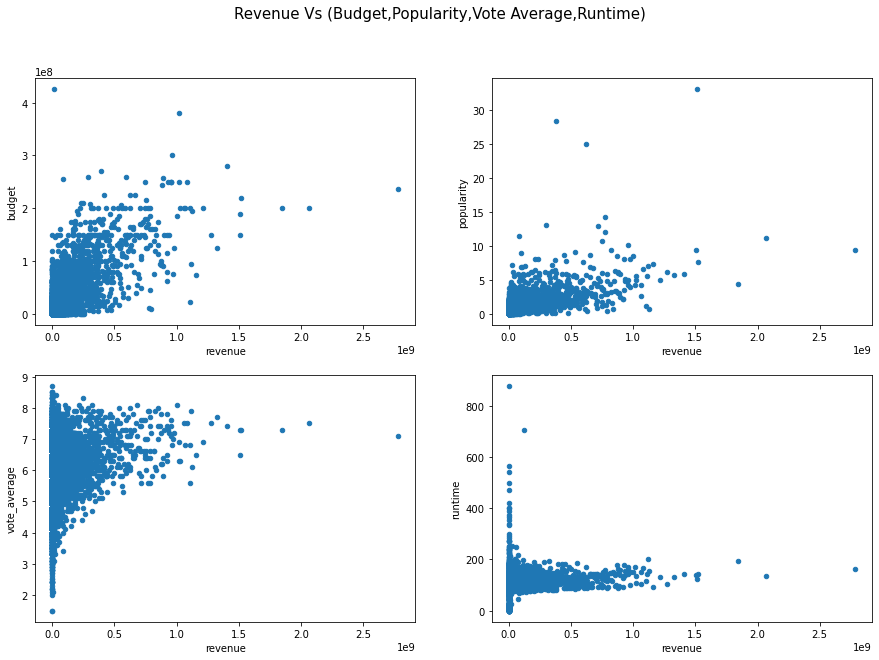

In [39]:
fig, axes = plt.subplots(2,2,figsize = (15,10))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=15)
data[['revenue','budget']].sort_values(by='revenue',ascending=False).plot(kind='scatter',x='revenue',y='budget',ax=axes[0][0])
data[['revenue','popularity']].sort_values(by='revenue',ascending=False).plot(kind='scatter',x='revenue',y='popularity',ax=axes[0][1])
data[['revenue','vote_average']].sort_values(by='revenue',ascending=False).plot(kind='scatter',x='revenue',y='vote_average',ax=axes[1][0])
data[['revenue','runtime']].sort_values(by='revenue',ascending=False).plot(kind='scatter',x='revenue',y='runtime',ax=axes[1][1])

<a id='conclusions'></a>
## Conclusions
>
> - The year which has the highest release of movies is 2014 followed by 2013 and 2015
> - The most movies release director is Woody Allen followed by Clint Eastwood and Steven Spielberg
> - The top popular movie is Jurassic World followed by Mad Max: Fury Road and Insurgent
> - Genre Has The Highest amount Of Movies is Drama followed by Comedy Thriller
> - Top Production Companies With Higher Number Of Movies Release is Paramount Pictures followed by Universal Pictures and Warner Bros.
> - The Most Frequent Actor is Robert De Niro followed by Samuel L. Jackson and Bruce Willis 
> - Movie with Highest And Lowest Vote Average. The Highest is Pink Floyd: Pulse And Lowest is Transmorphers
> - properties are associated with movies that have high revenues is High Budget and and High popularity
## Limitations
> - During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.
> - There ara alot of zero values in budget and revenue column which made me unable to answer the question of what the most profitable production companies, profitable genres, and movies.
and if I dropped it the data volume will decrease significantly